### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


## Data Understanding

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
for col in data.columns:
    print(col,"-->",data[col].unique())

destination --> ['No Urgent Place' 'Home' 'Work']
passanger --> ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather --> ['Sunny' 'Rainy' 'Snowy']
temperature --> [55 80 30]
time --> ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon --> ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration --> ['1d' '2h']
gender --> ['Female' 'Male']
age --> ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus --> ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children --> [1 0]
education --> ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation --> ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Pers

2. Investigate the dataset for missing or problematic data.

In [6]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

## Data Cleaning 
3. Decide what to do about your missing data -- drop, replace, other...

### Drop or impute missing data

In [7]:
print('Percent of missing "car" records is %.2f%%' %((data['car'].isnull().sum()/data.shape[0])*100))

Percent of missing "car" records is 99.15%


Since the percent of missing car records is 99.15% we will drop that column. 

In [8]:
print('Percent of missing "Bar" records is %.2f%%' %((data['Bar'].isnull().sum()/data.shape[0])*100))
print('The most common Bar frequency is %s.' %data['Bar'].value_counts().idxmax())

Percent of missing "Bar" records is 0.84%
The most common Bar frequency is never.


Percent of missing bar records is 0.84%, a total of 107 records so we will impute the missing data. The same data cleaning method will be applied to the following variables that all hover around 1% missing records, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50

In [9]:
print('Percent of missing "CoffeeHouse" records is %.2f%%' %((data['CoffeeHouse'].isnull().sum()/data.shape[0])*100))
print('The most common CoffeeHouse is %s.' %data['CoffeeHouse'].value_counts().idxmax())

Percent of missing "CoffeeHouse" records is 1.71%
The most common CoffeeHouse is less1.


In [10]:
print('Percent of missing "CarryAway" records is %.2f%%' %((data['CarryAway'].isnull().sum()/data.shape[0])*100))
print('The most common CarryAway is %s.' %data['CarryAway'].value_counts().idxmax())

Percent of missing "CarryAway" records is 1.19%
The most common CarryAway is 1~3.


In [11]:
print('Percent of missing "RestaurantLessThan20" records is %.2f%%' %((data['RestaurantLessThan20'].isnull().sum()/data.shape[0])*100))
print('The most common RestaurantLessThan20 is %s.' %data['RestaurantLessThan20'].value_counts().idxmax())

Percent of missing "RestaurantLessThan20" records is 1.02%
The most common RestaurantLessThan20 is 1~3.


In [12]:
print('Percent of missing "Restaurant20To50" records is %.2f%%' %((data['Restaurant20To50'].isnull().sum()/data.shape[0])*100))
print('The most common Restaurant20To50 is %s.' %data['Restaurant20To50'].value_counts().idxmax())

Percent of missing "Restaurant20To50" records is 1.49%
The most common Restaurant20To50 is less1.


In [13]:
# drop car column 
data.drop('car', axis=1, inplace=True)
# impute remaining columns with mode imputation 
data['Bar'].fillna(data['Bar'].value_counts().idxmax(), inplace=True)
data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().idxmax(), inplace=True)
data['CarryAway'].fillna(data['CarryAway'].value_counts().idxmax(), inplace=True)
data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().idxmax(), inplace=True)
data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().idxmax(), inplace=True)

In [14]:
# check that all null and N/A values are gone
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

### Convert categorical values to numeric to facilitate the analysis

In [15]:
data["age"].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [16]:
data["age"] = data["age"].str.replace("50plus","51")
data["age"] = data["age"].str.replace("below21","20")

In [17]:
data["age"] = pd.to_numeric(data["age"])

In [18]:
data["Bar"].value_counts()

Bar
never    5304
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [19]:
# using the midpoint method to detemine which integer value to replace with
data["Bar"] = data["Bar"].str.replace("never", "0")
data["Bar"] = data["Bar"].str.replace("less1", "1")
data["Bar"] = data["Bar"].str.replace("1~3", "2")
data["Bar"] = data["Bar"].str.replace("4~8", "6")
data["Bar"] = data["Bar"].str.replace("gt8", "9")

In [20]:
data["Bar"] = pd.to_numeric(data["Bar"])

In [21]:
data["Bar"].value_counts()

Bar
0    5304
1    3482
2    2473
6    1076
9     349
Name: count, dtype: int64

In [22]:
data["CoffeeHouse"].value_counts()

CoffeeHouse
less1    3602
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

In [23]:
data["CoffeeHouse"] = data["CoffeeHouse"].str.replace("never", "0")
data["CoffeeHouse"] = data["CoffeeHouse"].str.replace("less1", "1")
data["CoffeeHouse"] = data["CoffeeHouse"].str.replace("1~3", "2")
data["CoffeeHouse"] = data["CoffeeHouse"].str.replace("4~8", "6")
data["CoffeeHouse"] = data["CoffeeHouse"].str.replace("gt8", "9")

In [24]:
data["CoffeeHouse"] = pd.to_numeric(data["CoffeeHouse"])

In [25]:
data["CoffeeHouse"].value_counts()

CoffeeHouse
1    3602
2    3225
0    2962
6    1784
9    1111
Name: count, dtype: int64

In [26]:
# expiration --> ['1d' '2h'] convert to numeric hours
data['expiration'] = data['expiration'].str.replace("1d", "24")
data['expiration'] = data['expiration'].str.replace("2h", "2")
data["expiration"] = pd.to_numeric(data["expiration"])
data["expiration"].value_counts()

expiration
24    7091
2     5593
Name: count, dtype: int64

In [27]:
data["income"].value_counts()

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

In [28]:
data["income"] = data["income"].replace("\$25000 - \$37499", "31250", regex=True)
data["income"] = data["income"].replace("\$12500 - \$24999", "18750", regex=True)
data["income"] = data["income"].replace("\$37500 - \$49999", "43750", regex=True)
data["income"] = data["income"].replace("\$100000 or More", "100000", regex=True)
data["income"] = data["income"].replace("\$50000 - \$62499", "56250", regex=True)
data["income"] = data["income"].replace("Less than \$12500", "12500", regex=True)
data["income"] = data["income"].replace("\$87500 - \$99999", "93750", regex=True)
data["income"] = data["income"].replace("\$75000 - \$87499", "81250", regex=True)
data["income"] = data["income"].replace("\$62500 - \$74999", "68750", regex=True)

In [29]:
data["income"] = pd.to_numeric(data["income"])

In [30]:
data["income"].value_counts() # checking conversion 

income
31250     2013
18750     1831
43750     1805
100000    1736
56250     1659
12500     1042
93750      895
81250      857
68750      846
Name: count, dtype: int64

### Remove Duplicates

In [31]:
print("Shape of dataset before removing duplicates:",data.shape)
duplicate = data[data.duplicated(keep = 'last')] #(74, 26)
data = data.drop_duplicates()
print("Shape of dataset after removing duplicates:",data.shape)

Shape of dataset before removing duplicates: (12684, 25)
Shape of dataset after removing duplicates: (12610, 25)


Combine tocoupon_GEQ5min, tocoupon_GEQ15min, tocoupon_GEQ25min into driving distance and give the numeric values 5, 15, and 25.

In [32]:
# initilize distance column
data['drivingDistance'] = 0
conditions = [
    (data['toCoupon_GEQ25min'] == 1),
    (data['toCoupon_GEQ15min'] == 1),
    (data['toCoupon_GEQ5min'] == 1)
]
values = [25, 15, 5]
data['drivingDistance'] = np.select(conditions, values, default=0)
# ensure proper mapping 
print(data[['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'drivingDistance']].sample(10))

       toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  drivingDistance
5843                  1                  1                  0               15
1862                  1                  1                  0               15
11165                 1                  0                  0                5
8479                  1                  1                  0               15
10896                 1                  0                  0                5
8517                  1                  1                  0               15
3631                  1                  1                  0               15
6275                  1                  0                  0                5
1033                  1                  1                  0               15
6333                  1                  1                  1               25


In [33]:
data.drop(['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'], axis=1, inplace=True)
data.drop('direction_same', axis=1, inplace=True) # Direction same and opposite are perfectly correlated

In [34]:
y_column = data.pop('Y')  # Remove the 'Y' column and store it
data['Y'] = y_column  # Add the 'Y' column back, so it is now at the end

In [35]:
# data understanding again 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  int64 
 7   gender                12610 non-null  object
 8   age                   12610 non-null  int64 
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  int64 
 14  Bar                   12610 non-null  int64 
 15  CoffeeHouse           12610 non-null  int

## Data Exploration
4. What proportion of the total observations chose to accept the coupon?

The proportion that accepted the coupon is: 56.76%


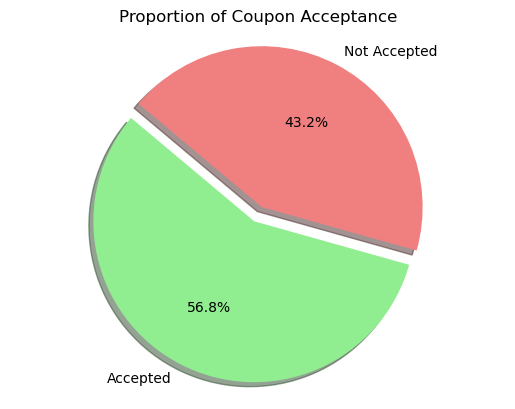

In [36]:
# Number of accepted coupons / total observations 
proportion_accepted = data['Y'].sum() / len(data)

plt.pie([proportion_accepted, 1 - proportion_accepted], explode=(0.1, 0), labels=['Accepted', 'Not Accepted'], autopct='%1.1f%%', colors = ['lightgreen', 'lightcoral'], startangle=140, shadow=True)
plt.axis('equal')
plt.title('Proportion of Coupon Acceptance')
print(f"The proportion that accepted the coupon is: {proportion_accepted:.2%}")
plt.savefig("images/all_coupon_acceptance.png"); 

5. Use a bar plot to visualize the `coupon` column.

In [37]:
all_coupons = data["coupon"].value_counts().reset_index() # Prepare data for the bar plot
all_coupons.columns = ['Coupon', 'Count']

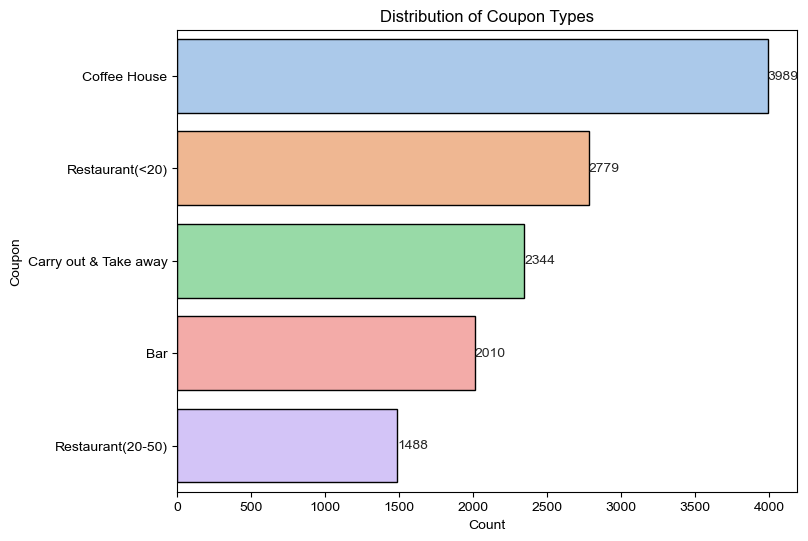

In [38]:
plt.figure(figsize=(8, 6))
barplot = sns.barplot(data = all_coupons, x = 'Count', y = 'Coupon', edgecolor = 'black', palette='pastel')
sns.set_style("whitegrid")
plt.title('Distribution of Coupon Types')
barplot.bar_label(barplot.containers[0])

plt.savefig("images/coupon_distribution.png")

6. Use a histogram to visualize the temperature column.

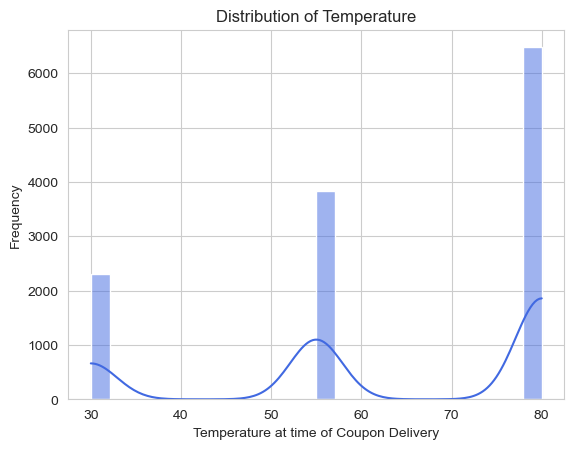

In [39]:
fig = sns.histplot(data = data, x ='temperature', color='royalblue', kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature at time of Coupon Delivery')
plt.ylabel('Frequency')
plt.savefig("images/temperature_histogram.png"); 

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [40]:
bar_data = data[data['coupon'].str.contains("Bar")] # Filter bar data

2. What proportion of bar coupons were accepted?

Proportion of accepted bar coupons: 41.00%


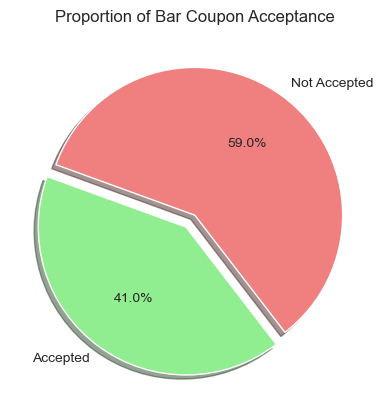

In [41]:
proportion_accepted_bar = bar_data['Y'].sum() / len(bar_data)

plt.pie([proportion_accepted_bar, 1 - proportion_accepted_bar], explode=(0.1, 0), labels=['Accepted', 'Not Accepted'], autopct='%1.1f%%', colors = ['lightgreen', 'lightcoral'], startangle=160, shadow=True)
plt.title('Proportion of Bar Coupon Acceptance');
print(f"Proportion of accepted bar coupons: {proportion_accepted_bar:.2%}")
plt.savefig("images/bar_coupon_acceptance.png"); 

#### Driver comparison 

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [42]:
three_or_fewer = bar_data.query("Bar <= 3").Y.mean()
more_than_three = bar_data.query("Bar > 3").Y.mean()

print(f"Acceptance rate for 3 or less bar visits: {three_or_fewer:.2%}")
print(f"Acceptance rate for more than 3 bar visits: {more_than_three:.2%}")

Acceptance rate for 3 or less bar visits: 37.05%
Acceptance rate for more than 3 bar visits: 76.88%


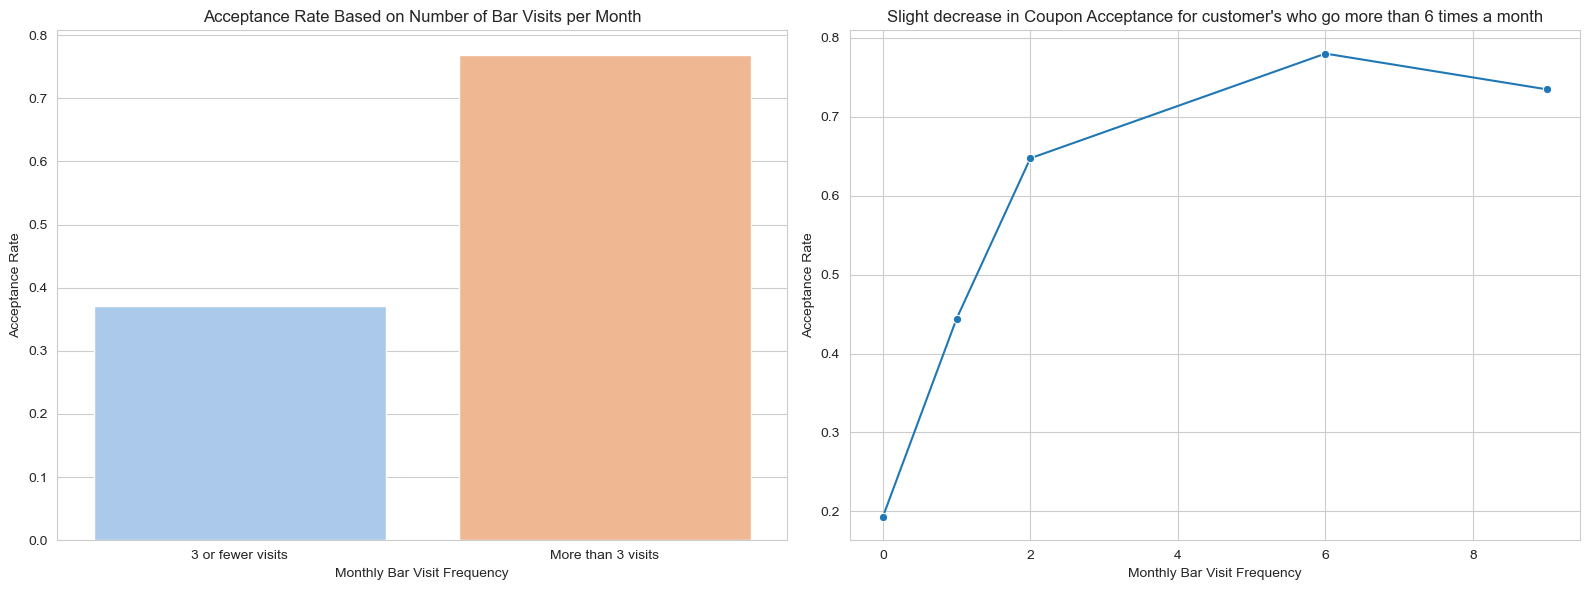

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
rates = { '3 or fewer visits': three_or_fewer, 'More than 3 visits': more_than_three }

sns.barplot(x=list(rates.keys()), y=list(rates.values()), palette="pastel", ax=axes[0])
axes[0].set_title('Acceptance Rate Based on Number of Bar Visits per Month')
axes[0].set_ylabel('Acceptance Rate')
axes[0].set_xlabel('Monthly Bar Visit Frequency')

detailed_rates = bar_data.groupby('Bar')['Y'].mean().reset_index()
detailed_rates['Bar'] = pd.Categorical(detailed_rates['Bar'], ordered=True)
sns.lineplot(data=detailed_rates, x='Bar', y='Y', marker='o')
axes[1].set_title("Slight decrease in Coupon Acceptance for customer's who go more than 6 times a month")
axes[1].set_ylabel('Acceptance Rate')
axes[1].set_xlabel("Monthly Bar Visit Frequency")
plt.savefig("images/bar_acceptance_rate_frequency_category.png")
plt.tight_layout()
plt.show()

**Finding:** This analysis clearly indicates that the frequency of bar visits has a strong correlation with the likelihood of accepting bar coupons, with more frequent visitors being substantially more inclined to accept them.
* The highest likelihood for the customers that visit the bar 6 times a month on average 
* There is a decrease in acceptance rate for driver's who visit the bar more than 6 times a month

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [44]:
group_1 = bar_data.query("(Bar > 1) and (age > 25)").Y.mean()
print(f"Acceptance rate for age > 25 and bar > 1/month: {group_1:.2%}")

Acceptance rate for age > 25 and bar > 1/month: 69.52%


In [45]:
group_2 = bar_data.query("(Bar <= 1) and (age <= 25)").Y.mean()
print(f"Acceptance rate for age <= 25 and bar < 1/month: {group_2:.2%}")

Acceptance rate for age <= 25 and bar < 1/month: 39.33%


**Finding:** Those who go to the bar often have a much higher acceptance rate then those who go to the bar once or less a month 

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [46]:
group_3 = bar_data.query("(Bar > 1) and (passanger in ['Friend(s)', 'Partner']) and (occupation not in ['Farming Fishing & Forestry'])").Y.mean()
print(f"Acceptance rate: {group_3:.2%}")

Acceptance rate: 71.79%


In [47]:
group_4 = bar_data.query("(Bar <= 1) and (passanger in 'Kid(s)') and (occupation in ['Farming Fishing & Forestry'])").Y.mean()
print(f"Acceptance rate: {group_4:.2%}")

Acceptance rate: 33.33%


**Finding:** Having Kids as passangers negativly effect the bar coupon acceptance rate. 

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



* go to bars more than once a month, had passengers that were not a kid, and were not widowed

In [48]:
group_5 = bar_data.query("(Bar > 1) and (passanger in ['Friend(s)', 'Partner']) and (maritalStatus != 'Widowed')").Y.mean()
print(f"Acceptance rate: {group_5:.2%}")

Acceptance rate: 71.79%


* go to bars more than once a month and are under the age of 30

In [49]:
group_6 = bar_data.query("(Bar > 1) and (age < 30)").Y.mean()
print(f"Acceptance rate: {group_6:.2%}")

Acceptance rate: 72.17%


* go to cheap restaurants more than 4 times a month and income is less than 50K

In [50]:
group_7 = bar_data.query("(income < 50000) and (RestaurantLessThan20 in ['4~8', 'gt8'])").Y.mean()
print(f"Acceptance rate: {group_7:.2%}")

Acceptance rate: 45.35%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

* **Higher Acceptance Among Frequent Bar Visitors:** The analysis reveals a strong correlation between the frequency of bar visits and the likelihood of accepting bar coupons. Notably, customers visiting bars around 6 times a month show the highest acceptance rate. However, there is a notable decrease in acceptance for those visiting more than 6 times a month, suggesting an optimal frequency range for targeting promotions.
* **Economic and Lifestyle Considerations:** Customers with an income under $50K who frequently dine at lower-cost restaurants are moderately receptive to bar coupons. This suggests that economic factors and lifestyle preferences play a role in determining coupon acceptance.
* **Demographic and Social Factors:** A combination of demographic characteristics (such as being under 30 or not widowed) and social factors (such as not having children as passengers) significantly boosts coupon acceptance rates. This indicates a segment of socially active and demographically distinct customers who are highly likely to engage with bar promotions.

Actionable Insights:
* **Target Marketing Efforts:** Focus marketing efforts on individuals who frequent bars 4 to 6 times a month. This group has shown the highest propensity to accept coupons, representing a sweet spot for promotional targeting. 
* **Consider Social Contexts:** Avoid targeting customers likely to have children as passengers during the promotion's intended use period. Instead, target customers based on their likely social setting with Friends or Partner to increase acceptance.
* **Segmentation and Personalization:** Use the insights to segment the customer base more effectively and personalize promotions to match the identified characteristics and preferences of each segment.

This analysis provides a strategic framework for leveraging customer behavior insights to optimize bar coupon campaigns, driving higher engagement, and fostering stronger customer relationships.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### Explore coupon categorys

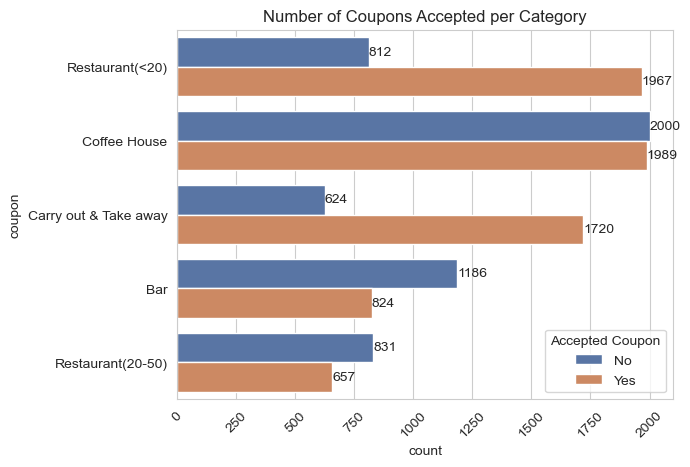

In [51]:
coupon_ratio = sns.countplot(data, y = "coupon", hue = 'Y', palette = 'deep')
plt.xticks(rotation=45)
plt.legend(title = "Accepted Coupon", labels = ["No", "Yes"])
plt.title("Number of Coupons Accepted per Category")

for container in coupon_ratio.containers:
    coupon_ratio.bar_label(container)
plt.savefig("images/all_coupons_acceptance_ratio.png")

**Findings:** 
* The most accpeted coupons are cheap restaurants and Carry out & Take away. 
* Since the **most coupons are offered in the Coffee House category** I will go ahead and do the next analysis on this coupon type. 

In [52]:
# filter datatset and create dataframe only for coffee house coupons 
coffee_data = data[data['coupon'].str.contains("Coffee")]

### Analyzing Coffee House Coupon Acceptance

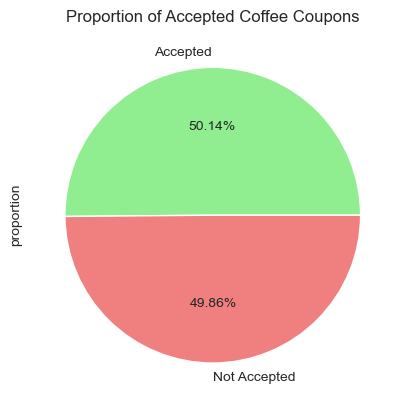

In [53]:
# calculate proportion of accepted coffee house coupons 
coffee_data['Y'].value_counts(normalize=True).plot.pie(autopct='%.2f%%', labels=['Accepted', 'Not Accepted'], colors = ['lightgreen', 'lightcoral'])
plt.title('Proportion of Accepted Coffee Coupons');
plt.savefig("images/coffee_coupon_acceptance.png")

**Finding:** Coffee coupons exhibit a balanced distribution with an acceptance rate of 50.14% and a rejection rate of 49.86%, indicating no class imbalance in the dataset.

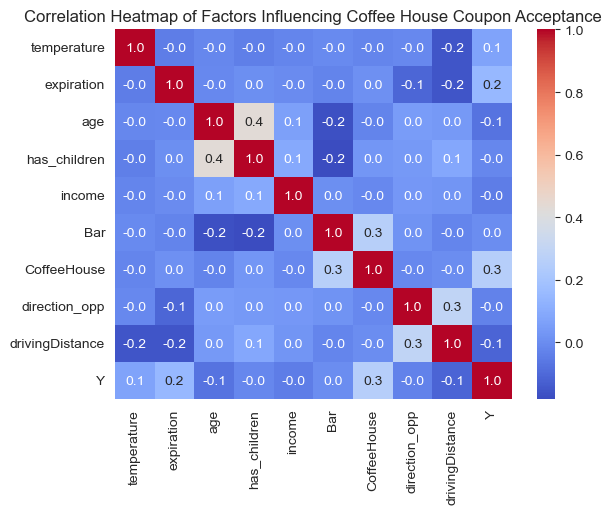

In [54]:
sns.heatmap(coffee_data.corr(numeric_only=True), annot=True, fmt=".1f", cmap='coolwarm')
plt.title("Correlation Heatmap of Factors Influencing Coffee House Coupon Acceptance");

**Finding:** A positive correlation (0.2) exists between the time until coupon expiration and acceptance rate, suggesting customers are more likely to accept coupons with longer validity.

## Further Investigation of Acceptance Patterns

### Acceptance Rate Based on Coffee House Visit Frequency

In [55]:
coffee_three_or_fewer = bar_data.query("CoffeeHouse <= 3").Y.mean()
coffee_more_than_three = bar_data.query("CoffeeHouse > 3").Y.mean()

print(f"Acceptance rate for 3 or less coffee house visits: {coffee_three_or_fewer:.2%}")
print(f"Acceptance rate for more than 3 coffee house visits: {coffee_more_than_three:.2%}")

Acceptance rate for 3 or less coffee house visits: 39.55%
Acceptance rate for more than 3 coffee house visits: 45.81%


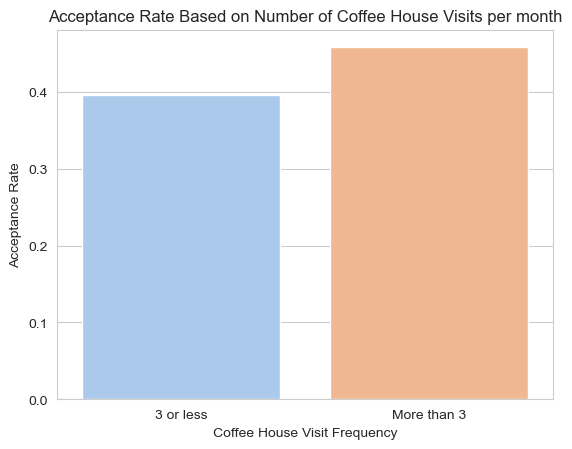

In [56]:
rates = { '3 or less': coffee_three_or_fewer, 'More than 3': coffee_more_than_three }

sns.barplot(x=list(rates.keys()), y=list(rates.values()), palette="pastel")
plt.title('Acceptance Rate Based on Number of Coffee House Visits per month')
plt.ylabel('Acceptance Rate')
plt.xlabel('Coffee House Visit Frequency')
plt.savefig("images/coffee_acceptance_rate_frequency_categories.png")

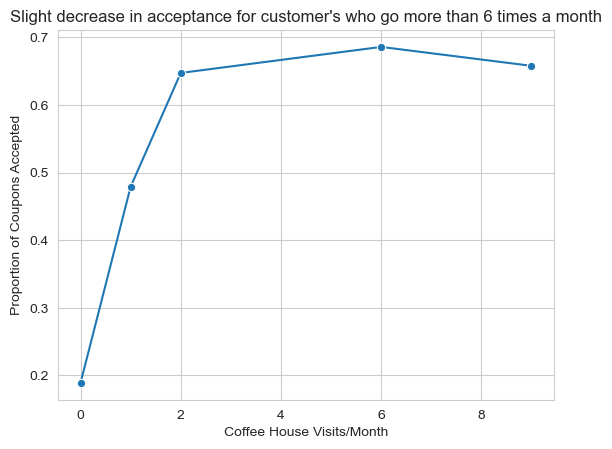

In [57]:
proportion_data = coffee_data.groupby('CoffeeHouse')['Y'].mean().reset_index()
proportion_data['CoffeeHouse'] = pd.Categorical(proportion_data['CoffeeHouse'], ordered=True)
sns.lineplot(data=proportion_data, x='CoffeeHouse', y='Y', marker='o')
plt.title("Slight decrease in acceptance for customer's who go more than 6 times a month")
plt.xlabel("Coffee House Visits/Month")
plt.ylabel("Proportion of Coupons Accepted")
plt.savefig("images/coffee_acceptance_rate_frequency_detailed.png");
plt.show()

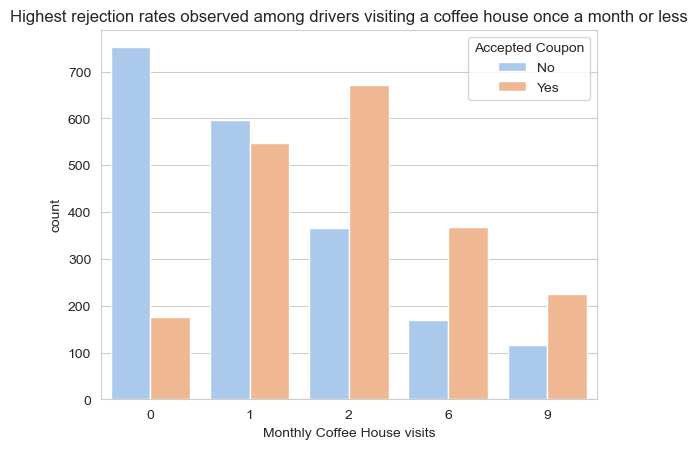

In [58]:
sns.countplot(coffee_data, x= "CoffeeHouse", hue = 'Y', palette = 'pastel')
plt.title("Highest rejection rates observed among drivers visiting a coffee house once a month or less")
plt.legend(title = "Accepted Coupon", labels = ["No", "Yes"])
plt.xlabel("Monthly Coffee House visits")
plt.savefig("images/coffee_rejection_rate")

### Visit Frequency and Age Comparison

In [59]:
coffee_1 = coffee_data.query("(CoffeeHouse > 1) and (age >= 25)").Y.mean()
print(f"Acceptance rate for age 25+, more than 1 coffee house visit: {coffee_1:.2%}")

Acceptance rate for age 25+, more than 1 coffee house visit: 63.81%


In [60]:
coffee_1 = coffee_data.query("(CoffeeHouse <= 1) and (age >= 25)").Y.mean()
print(f"Acceptance rate for age 25+, 1 or less coffee house visits: {coffee_1:.2%}")

Acceptance rate for age 25+, 1 or less coffee house visits: 34.69%


In [61]:
coffee_3 = coffee_data.query("(CoffeeHouse > 1) and (age <= 25)").Y.mean()
print(f"Acceptance rate for for age below 25, more than 1 visit: {coffee_3:.2%}")

Acceptance rate for for age below 25, more than 1 visit: 71.28%


In [62]:
coffee_4 = coffee_data.query("(CoffeeHouse <= 1) and (age <= 25)").Y.mean()
print(f"Acceptance rate for for age below 25, 1 or less visits: {coffee_4:.2%}")

Acceptance rate for for age below 25, 1 or less visits: 35.65%


**Finding:** Customer's that visit the coffee shop at least once a month are more inclined to accept the coupon regardless of age. 

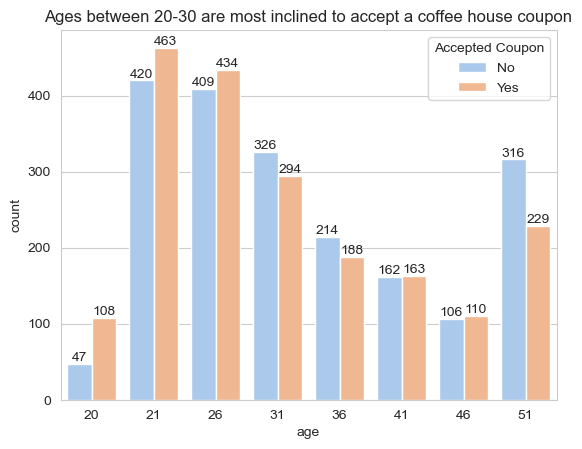

In [63]:
age_ratio = sns.countplot(coffee_data, x = 'age', hue = 'Y', palette='pastel')
plt.legend(title = "Accepted Coupon", labels = ["No", "Yes"])
plt.title("Ages between 20-30 are most inclined to accept a coffee house coupon")
plt.savefig("images/coffee_house_age_acceptance.png")

for container in age_ratio.containers:
    age_ratio.bar_label(container)

### Compare acceptance rates based on complex criteria involving frequency of visiting coffee houses, passenger type, marital status and age

In [64]:
# Group by PassengerType and calculate the mean acceptance for each group
acceptance_by_passenger_type = coffee_data.groupby('passanger')['Y'].mean().reset_index()

# Sort the results to find the passenger type with the highest acceptance ratio
acceptance_by_passenger_type_sorted = acceptance_by_passenger_type.sort_values(by='Y', ascending=False)

# Display the sorted results
print("Acceptance Ratio by Passenger Type:")
print(acceptance_by_passenger_type_sorted)

Acceptance Ratio by Passenger Type:
   passanger         Y
1  Friend(s)  0.596248
3    Partner  0.569079
2     Kid(s)  0.480583
0      Alone  0.437639


In [65]:
acceptance_by_occupation = coffee_data.groupby('occupation')['Y'].mean().reset_index()

# Sort the results to find the occupation with the highest acceptance ratio
acceptance_by_occupation_sorted = acceptance_by_occupation.sort_values(by='Y', ascending=False)

# Display the sorted results
print("Acceptance Ratio by Occupation:")
print(acceptance_by_occupation_sorted)

Acceptance Ratio by Occupation:
                                   occupation         Y
10       Healthcare Practitioners & Technical  0.743243
2   Building & Grounds Cleaning & Maintenance  0.727273
22                                    Student  0.625251
23           Transportation & Material Moving  0.618421
11                         Healthcare Support  0.615385
12          Installation Maintenance & Repair  0.568182
0                  Architecture & Engineering  0.555556
8                  Farming Fishing & Forestry  0.545455
24                                 Unemployed  0.542105
1    Arts Design Entertainment Sports & Media  0.507177
5                     Computer & Mathematical  0.500000
17                    Personal Care & Service  0.500000
3                        Business & Financial  0.479452
6                   Construction & Extraction  0.478261
14               Life Physical Social Science  0.475410
15                                 Management  0.452381
19              

In [66]:
coffee_5 = coffee_data.query("(CoffeeHouse > 1) and (passanger in ['Friend(s)', 'Partner']) and (occupation not in ['Farming Fishing & Forestry'])").Y.mean()
print(f"Acceptance rate: {coffee_5:.2%}")

Acceptance rate: 76.63%


In [67]:
coffee_6 = coffee_data.query("(CoffeeHouse <= 1) and (passanger in ['Kid(s)']) and (occupation in ['Farming Fishing & Forestry'])").Y.mean()
print(f"Acceptance rate: {coffee_6:.2%}")

Acceptance rate: 66.67%


In [68]:
coffee_7 = coffee_data.query("(CoffeeHouse > 1) and (passanger not in ['Kid(s)', 'Alone']) and (maritalStatus != 'Widowed')").Y.mean()
print(f"Acceptance rate: {coffee_7:.2%}")

Acceptance rate: 76.63%


In [69]:
coffee_8 = coffee_data.query("(CoffeeHouse > 1) and (age < 30)").Y.mean()
print(f"Acceptance rate: {coffee_8:.2%}")

Acceptance rate: 68.93%


In [70]:
coffee_9 = coffee_data.query("(income < 50000) and (RestaurantLessThan20 in ['4~8', 'gt8'])").Y.mean()
print(f"Acceptance rate: {coffee_9:.2%}")

Acceptance rate: 54.30%


## Impact of time of day on coupon acceptance

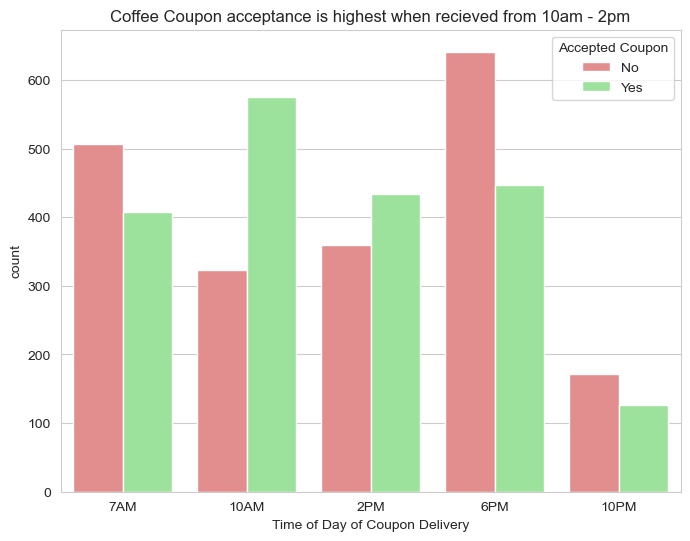

In [71]:
plt.figure(figsize=(8, 6))
time_ratio = sns.countplot(coffee_data, x = 'time', hue = 'Y', order = ['7AM','10AM', '2PM', '6PM','10PM'], palette = ['lightcoral', 'lightgreen'])
plt.legend(title = "Accepted Coupon", labels = ["No", "Yes"])
plt.title("Coffee Coupon acceptance is highest when recieved from 10am - 2pm")
plt.xlabel("Time of Day of Coupon Delivery")
plt.savefig("images/coffee_acceptance_by_time.png");

### Hypothesis

Based on the findings, we hypothesize that the likelihood of accepting a coffee coupon is significantly influenced by several factors including:
- **Visit Frequency to Coffee Houses**: More frequent visits correlate with a higher acceptance rate.
- **Expiration Time of the Coupon**: Longer expiration times tend to encourage higher acceptance rates.
- **Age of the Customer**: Younger customers, particularly those under 30, have a higher propensity to accept coffee coupons.
- **Type of Passengers Present**: The presence of friends or partners as passengers increases the likelihood of coupon acceptance.
- **Specific Occupational Categories**: Certain professions are more likely to accept coupons.

This analysis suggests that **personalized marketing strategies** targeting these demographics and preferences could significantly improve coupon acceptance rates.

#### Actionable Recommendations

To leverage the insights gained from our analysis, we recommend the following strategies:

- **Longer Expiration Periods**: Extend the expiration times of coupons to make them more appealing and to encourage higher acceptance rates.

- **Focus on Frequent Visitors**: Tailor promotions and offers towards customers who visit coffee houses more than once a month, while being mindful of the diminishing returns among extremely frequent visitors.

- **Target Younger Demographics**: Direct marketing efforts towards younger customers, especially those under the age of 30, who have shown a higher inclination to accept coffee coupons.

- **Leverage Social Dynamics**: Design promotions that encourage group visits or social gatherings, taking advantage of the higher acceptance rates observed when customers are accompanied by friends or partners.

- **Time-Sensitive Promotions**: Schedule promotions during peak times, specifically between 10am and 2pm, to optimize customer engagement and interest.

- **Occupation-Based Targeting**: Incorporate occupational data into targeting criteria for coupon distributions, focusing on professions with higher observed acceptance rates.


## Recommended Next Steps for Coupon Acceptance Analysis

Building on the insights from the initial analysis, the next phase involves developing a machine learning model to test and potentially validate our hypotheses.

### Data Preparation for Machine Learning
- **Feature Engineering**: Convert categorical variables into numerical formats using encoding techniques. Use:
  - *One-hot encoding* for nominal data.
  - *Ordinal encoding* for ordinal data.
- **Feature Selection**: Identify features likely to influence coupon acceptance, such as visit frequency, age, time until expiration, passenger type, and occupation.

### Model Selection
Select appropriate models for the classification task, considering:
- **Logistic Regression**: For baseline and interpretability.
- **Random Forest**: For robustness and ensemble learning advantages.
- **Gradient Boosting Machines (GBM)**: For improving prediction accuracy iteratively.
- **Support Vector Machines (SVM)**: For effectiveness in high-dimensional spaces.

### Interpretation and Insights
- Compare the models' findings with initial hypotheses to assess the accuracy of pre-analysis insights.
- Analyze outcomes and feature importance scores to understand key factors influencing coupon acceptance.

This approach aims to refine marketing strategies and deepen customer engagement through data-driven insights.
